# REDES NEURONALES

---



## Introducción



En esta actividad vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas celdas si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. Por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch.

In [12]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import matplotlib.pyplot as plt

En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [13]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [14]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

In [15]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt


Label: 9


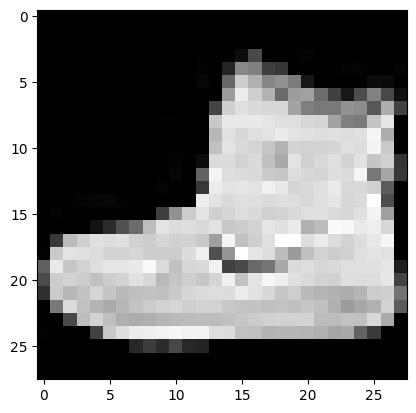

In [16]:
print("Label: {}".format(training_labels[0]))
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro

In [17]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

Habréis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [18]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.25 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [19]:
print("Number of images of the train set: {}".format(len(training_images)))
print("Number of images of the test set: {}".format(len(test_images)))

Number of images of the train set: 60000
Number of images of the test set: 10000


Hay un total de 60000 imágenes en el set de entrenamiento y 10000 en el set de test.

In [20]:
len(training_images[0])

28

In [21]:
training_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
training_images[0].size

784

*Podemos observar que las imágenes con las que estamos trabajando tienen dimensiones de 28x28 píxeles, con una totalidad de 784 píxeles por imagen*

**Pregunta 1.2 *(0.25 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

In [23]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[training_labels[0]]

'Ankle boot'

*En las etiquetas del conjunto de datos, tanto de entrenamiento como de test, podemos ver qué tipo de prenda contiene cada imagen*

## 2. Creación del Modelo

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy útiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imágenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 2.1 (2 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaño 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

**Normalizamos los datos de validación para mejorar el accuracy del modelo**

In [25]:
X_valid, X_train = training_images[:5000], training_images[5000:]
y_valid, y_train = training_labels[:5000], training_labels[5000:]

In [26]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### **Diseñamos la red neuronal**

In [27]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### **Compilamos el modelo**

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

#### **Entrenando y evaluando el modelo**

In [30]:
history = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.5195 - accuracy: 0.8188 - val_loss: 0.4038 - val_accuracy: 0.8598
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3873 - accuracy: 0.8628 - val_loss: 0.3482 - val_accuracy: 0.8780
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3498 - accuracy: 0.8747 - val_loss: 0.3227 - val_accuracy: 0.8804
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3209 - accuracy: 0.8842 - val_loss: 0.3025 - val_accuracy: 0.8892
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3033 - accuracy: 0.8893 - val_loss: 0.2990 - val_accuracy: 0.8910
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2868 - accuracy: 0.8955 - val_loss: 0.2601 - val_accuracy: 0.9058
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.2764 - accuracy: 0.8990 - val_loss: 0.2512 - val_accuracy: 0.9044
Epoch 

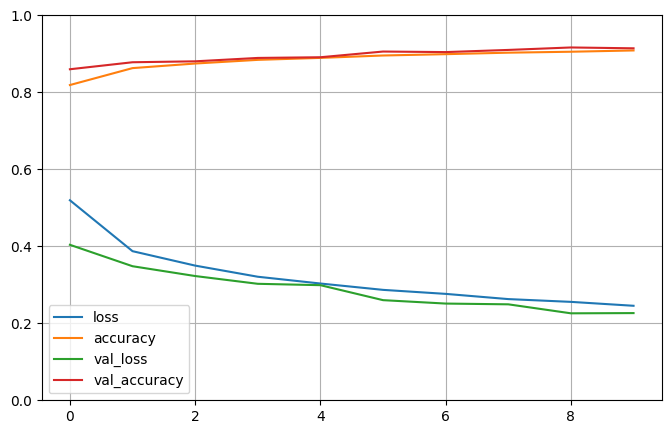

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Para concluir el entrenamiento de la red neuronal, una buena práctica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2.2 (0.5 puntos)**: Evalúa el modelo con las imágenes y etiquetas test.

In [32]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8821


[0.3296174108982086, 0.882099986076355]


## 3: Funcionamiento de las predicción de la red neuronal



Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

Sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador con las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto? ¿Qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [33]:
classificatios = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [34]:
classificatios[0]

array([2.5880979e-06, 1.9694619e-08, 9.5957731e-09, 3.8337746e-09, 2.0701178e-07, 3.1987298e-03, 3.2653249e-06, 2.3212885e-02, 1.9574305e-05, 9.7356266e-01], dtype=float32)

Tu respuesta a la pregunta 3.1 aquí:

*La función .predict() de keras aplicada al conjunto de test nos proporciona un array de con las probabilidades de que se trate de una categoría u otra. En este caso podemos observar como la etiqueta más probable es efectivamente la de la etiqueta número 9, "ankle boot"*

Tu respuesta a la pregunta 3.2 aquí:

In [35]:
# Hay que tener en cuenta que esta función está pensada para las predicciones del modelo
def clase_mas_probable(i):
    if i >= 0 and i < 10:
        print("La clase más probable para la imagen número {} es {} con la etiqueta número {}".format(i + 1, class_names[list(classificatios[i]).index(max(classificatios[i]))], list(classificatios[i]).index(max(classificatios[i]))))
        plt.imshow(training_images[i], cmap="gray")
    else:
        print("Not in the wardrobe")
    

La clase más probable para la imagen número 1 es Ankle boot con la etiqueta número 9


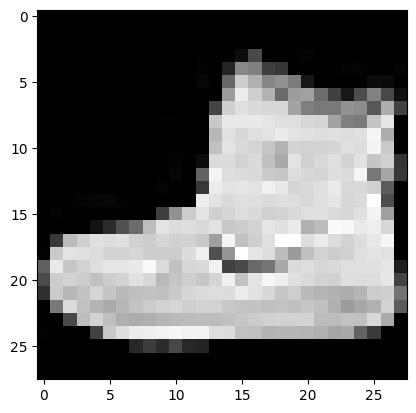

In [36]:
clase_mas_probable(0)

In [37]:
test_labels[0]

9

In [38]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
class_names[test_labels[0]]

'Ankle boot'

## 4: Impacto variar el número de neuronas en las capas ocultas





En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y en su capa oculta cambia las 128 neuronas por:

* **512 neuronas en la capa oculta
* **1024 neuronas en la capa oculta

Entrena la red en ambos casos.

#### 512 Neuronas

In [40]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4845 - accuracy: 0.8289 - val_loss: 0.3504 - val_accuracy: 0.8778
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3616 - accuracy: 0.8692 - val_loss: 0.3164 - val_accuracy: 0.8818
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3208 - accuracy: 0.8821 - val_loss: 0.2967 - val_accuracy: 0.8900
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2974 - accuracy: 0.8897 - val_loss: 0.2540 - val_accuracy: 0.9054
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2811 - accuracy: 0.8973 - val_loss: 0.2579 - val_accuracy: 0.9040
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2641 - accuracy: 0.9027 - val_loss: 0.2432 - val_accuracy: 0.9084
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2523 - accuracy: 0.9071 - val_loss: 0.2373 - val_accuracy: 0.9102
Epoch 

In [41]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8774


[0.3564845025539398, 0.8773999810218811]

In [42]:
classificatios = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


La clase más probable para la imagen número 1 es Ankle boot con la etiqueta número 9


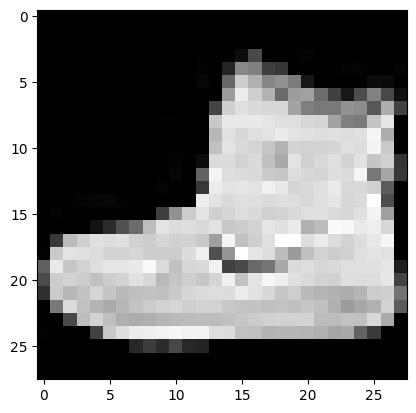

In [43]:
clase_mas_probable(0)

#### 1024 Neuronas

In [44]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4741 - accuracy: 0.8316 - val_loss: 0.3407 - val_accuracy: 0.8784
Epoch 2/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3579 - accuracy: 0.8697 - val_loss: 0.3205 - val_accuracy: 0.8836
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.3219 - accuracy: 0.8816 - val_loss: 0.2759 - val_accuracy: 0.8968
Epoch 4/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2951 - accuracy: 0.8898 - val_loss: 0.2775 - val_accuracy: 0.8976
Epoch 5/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2793 - accuracy: 0.8960 - val_loss: 0.2629 - val_accuracy: 0.8970
Epoch 6/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2608 - accuracy: 0.9027 - val_loss: 0.2310 - val_accuracy: 0.9112
Epoch 7/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2509 - accuracy: 0.9065 - val_loss: 0.2301 - val_accuracy: 0.914

In [45]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8862


[0.32770323753356934, 0.8862000107765198]

In [46]:
classificatios = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


**pregunta 4.1 (0.5 puntos)**: ¿Cuál es el impacto que tiene la red neuronal? 

*Podemos observar una ínfima mejora en el modelo y un tiempo de ejecución superior, pasando de tardar 39 segundos a casi 60. No merece la pena aumentar el número de neuronas dentro de la misma capa para este problema en concreto.*

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

La clase más probable para la imagen número 1 es Ankle boot con la etiqueta número 9


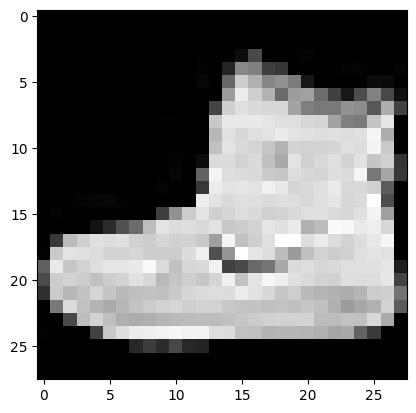

In [47]:
clase_mas_probable(0)


**pregunta 4.2 (0.25 puntos)**: 

* ¿En qué clase está clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 4.3 (0.25 puntos)**: 

* ¿Por qué crees que ha ocurrido esto?

Tu respuesta a la pregunta 4.2 aquí:

*La primera prenda de vestir la clasifica correctamente como un Ankle boot*

Tu respuesta a la pregunta 4.3 aquí:

*Tanto con 512 como 1024 neuronas en la capa oculta podemos ver que el modelo predice que la primera imagen del set de test es un Ankle boot. Esto es así porque con la cantidad y sencillez de los datos con los que estamos trabajando, aumentar el número de nueronas de la capa oculta no mejora practicamente nada el resultado del modelo*

## 5: Capa Flatten




En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 5 (0.5 puntos):** ¿Puedes explicar a qué se debe el error que da?

In [2]:
model= keras.models.Sequential([
    # keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

NameError: name 'keras' is not defined

Tu respuesta a la pregunta 5 aquí:

*El modelo fracasa en entrenar con los datos porque la capa de entrada no es unidimensional. Necesitamos .Flatten() para convertir los píxeles de la imagen, que consta de una matriz bidimiensional de 28x28, en otra matriz unidimensional de 784x1*

## 6: Número de neuronas de la capa de salida


Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 6.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 6.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [1]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64, validation_data=(X_valid, y_valid))

NameError: name 'keras' is not defined

Tu respuestas a la pregunta 6.1 aquí:

*En la capa de salida necesitamos tantas neuronas como clases vayamos a predecir. Por eso al haber 10 clases necesitaremos 10 neuronas*

Tu respuestas a la pregunta 6.2 aquí:

*Al tener un número de neuronas diferente al número de clases, el modelo simplemente sería incapaz de entrenar y aprender*

## 7: Aumento de epoch y su efecto en la red neuronal


En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 7.1 (0.15 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

In [50]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=15, batch_size=64, validation_data=(X_valid, y_valid))

model.evaluate(test_images, test_labels)

Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.5183 - accuracy: 0.8198 - val_loss: 0.3875 - val_accuracy: 0.8712
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3853 - accuracy: 0.8633 - val_loss: 0.3548 - val_accuracy: 0.8704
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3461 - accuracy: 0.8755 - val_loss: 0.3205 - val_accuracy: 0.8832
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3217 - accuracy: 0.8840 - val_loss: 0.2836 - val_accuracy: 0.8954
Epoch 5/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3037 - accuracy: 0.8888 - val_loss: 0.2696 - val_accuracy: 0.9014
Epoch 6/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2882 - accuracy: 0.8949 - val_loss: 0.2628 - val_accuracy: 0.9052
Epoch 7/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2737 - accuracy: 0.8989 - val_loss: 0.2361 - val_accuracy: 0.9156
Epoch 

[0.34068775177001953, 0.8834999799728394]

**pregunta 7.2 (0.15 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

In [51]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(len(np.unique(training_labels)), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=30, batch_size=64, validation_data=(X_valid, y_valid))

model.evaluate(test_images, test_labels)

Epoch 1/30
938/938 [==============================] - 4s 3ms/step - loss: 0.5232 - accuracy: 0.8187 - val_loss: 0.4031 - val_accuracy: 0.8638
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3937 - accuracy: 0.8603 - val_loss: 0.3343 - val_accuracy: 0.8834
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3521 - accuracy: 0.8724 - val_loss: 0.3180 - val_accuracy: 0.8860
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3257 - accuracy: 0.8824 - val_loss: 0.3032 - val_accuracy: 0.8866
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.3068 - accuracy: 0.8881 - val_loss: 0.2729 - val_accuracy: 0.9008
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2929 - accuracy: 0.8935 - val_loss: 0.2593 - val_accuracy: 0.9038
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2802 - accuracy: 0.8975 - val_loss: 0.2524 - val_accuracy: 0.9094
Epoch 

[0.3655884265899658, 0.8888000249862671]

**pregunta 7.3 (0.20 puntos)**
* ¿Por qué piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

Tu respuesta a la pregunta 7.3 aquí:

*El accuracy de ambos modelos con 15 y 30 epochs respectivamente, es practicamente el mismo. Lo que sí podemos apreciar es un empeoramiento del coste a mayor número de epochs. Esto puede significar que el modelo está sufriendo de overfitting ya que no hay suficientes datos como para dedicarles tanto tiempo y ciclos de aprendizaje para  aprenderlos.*

## 8: Early stop


En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del código de ejemplo, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [52]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')> 0.85):
                  print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
                  self.model.stop_training = True

In [53]:
# import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

callbacks = myCallback()
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0


model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, batch_size=64, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

2.12.0
Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5211 - accuracy: 0.8179
Epoch 2/50
938/938 [==============================] - ETA: 0s - loss: 0.3870 - accuracy: 0.8613
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
313/313 [==============================] - 1s 2ms/step - loss: 0.4076 - accuracy: 0.8521


[0.40757325291633606, 0.8521000146865845]

**Ejercicio 8 *(0.75 puntos)***: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [54]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
            if(logs.get('loss') < 0.4):
                  print("\nAlcanzado el 40 de pérdida, se cancela el entrenamiento!!")
                  self.model.stop_training = True

In [55]:
# import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

callbacks = myCallback()
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# training_images = training_images/255.0
# test_images = test_images/255.0


model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, batch_size=64, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

2.12.0
Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.5188 - accuracy: 0.8197
Epoch 2/50
931/938 [============================>.] - ETA: 0s - loss: 0.3885 - accuracy: 0.8613
Alcanzado el 40 de pérdida, se cancela el entrenamiento!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3992 - accuracy: 0.8582


[0.399247407913208, 0.8582000136375427]

## 9. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Como hemos visto en clase, funciones de activación como sigmoid han dejado de utilizarse en favor de otras como ReLU.

**Ejercicio 9 *(0.75 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [56]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
            perdida = 0.4
            precision = 0.9
            if(logs.get('accuracy') > precision and logs.get('loss') < perdida):
                  print("\nAlcanzado el {}% de precisión y {}% de pérdida, se cancela el entrenamiento!!".format(precision, perdida))
                  self.model.stop_training = True
callbacks = myCallback()

#### ReLu

In [57]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, batch_size=64, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 0.5087 - accuracy: 0.8177
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3680 - accuracy: 0.8662
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3363 - accuracy: 0.8766
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3103 - accuracy: 0.8849
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2915 - accuracy: 0.8921
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2802 - accuracy: 0.8943
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2681 - accuracy: 0.8991
Epoch 8/50
929/938 [============================>.] - ETA: 0s - loss: 0.2553 - accuracy: 0.9035
Alcanzado el 0.9% de precisión y 0.4% de pérdida, se cancela el entrenamiento!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8786


[0.3434407114982605, 0.878600001335144]

#### Sigmoid

In [58]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, batch_size=64, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

Epoch 1/50
938/938 [==============================] - 5s 4ms/step - loss: 0.9066 - accuracy: 0.6541
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.4692 - accuracy: 0.8319
Epoch 3/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3912 - accuracy: 0.8585
Epoch 4/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3563 - accuracy: 0.8720
Epoch 5/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3341 - accuracy: 0.8791
Epoch 6/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3164 - accuracy: 0.8847
Epoch 7/50
938/938 [==============================] - 4s 4ms/step - loss: 0.3008 - accuracy: 0.8905
Epoch 8/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2897 - accuracy: 0.8941
Epoch 9/50
938/938 [==============================] - 4s 4ms/step - loss: 0.2796 - accuracy: 0.8991
Epoch 10/50
932/938 [============================>.] - ETA: 0s - loss: 0.2686 - accuracy: 0.9014
Alc

[0.34376025199890137, 0.8801000118255615]

#### Tanh

In [59]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(512, activation=tf.nn.tanh),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=50, batch_size=64, callbacks=[callbacks])

model.evaluate(test_images, test_labels)

Epoch 1/50
938/938 [==============================] - 13s 13ms/step - loss: 0.5143 - accuracy: 0.8136
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3972 - accuracy: 0.8548
Epoch 3/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3592 - accuracy: 0.8676
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3415 - accuracy: 0.8737
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3240 - accuracy: 0.8812
Epoch 6/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3083 - accuracy: 0.8860
Epoch 7/50
938/938 [==============================] - 12s 13ms/step - loss: 0.3021 - accuracy: 0.8863
Epoch 8/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2882 - accuracy: 0.8929
Epoch 9/50
938/938 [==============================] - 12s 13ms/step - loss: 0.2813 - accuracy: 0.8969
Epoch 10/50
938/938 [==============================] - 12s 13ms/step - loss: 0.275

[0.3768080174922943, 0.8725000023841858]

*La comparación entre el uso de la función de activación sigmoid y ReLU en una red neuronal sencilla puede tener varias diferencias en términos de velocidad de convergencia y rendimiento del modelo.*

*En general, la función de activación ReLU se ha demostrado que converge más rápido en comparación con la función sigmoid en la mayoría de los casos, esto se debe principalmente a que la función ReLU no presenta saturación en la región positiva, es decir, la derivada nunca es cero, mientras que en sigmoid si hay una región en la que la derivada es muy pequeña (cercana a cero) y puede hacer que el entrenamiento sea lento.*

*Además, la función ReLU ha demostrado ser más efectiva en la prevención del sobreajuste (overfitting), lo que se debe a que la función ReLU puede disminuir la correlación entre las neuronas adyacentes, lo que reduce la dependencia de las neuronas entre sí y, por lo tanto, ayuda a prevenir el sobreajuste.*

*En términos de rendimiento del modelo, la función ReLU también puede proporcionar resultados ligeramente mejores en comparación con la función sigmoid. Esto se debe a que la función ReLU permite la propagación de gradientes más fuertes en la red neuronal, lo que puede mejorar la capacidad de la red para aprender representaciones abstractas de los datos.*

*En cuanto a otras funciones de activación disponibles en Keras, hay muchas opciones diferentes, cada una con sus ventajas y desventajas. Por ejemplo, la función de activación tanh (tangente hiperbólica) se utiliza comúnmente en redes neuronales porque puede proporcionar resultados ligeramente mejores que sigmoid en algunos casos. También hay otras funciones de activación como la función softmax, la función ELU (exponential linear unit) y la función Swish, que han demostrado ser efectivas en diferentes aplicaciones.*

*Sintetizando, la función de activación ReLU puede ser una mejor opción en comparación con sigmoid en la mayoría de los casos, debido a su rapidez de convergencia y capacidad para prevenir el sobreajuste. Sin embargo, es importante tener en cuenta que cada función de activación tiene sus propias ventajas y desventajas, y debe seleccionarse de acuerdo con la tarea específica que se esté abordando*

## 10. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 10 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

#### *Inicialización con ceros*

In [60]:
from tensorflow import initializers

In [61]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(128,
    activation="relu",
    kernel_initializer=keras.initializers.zeros,
    ),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=10, batch_size=64, callbacks=[callbacks], validation_data=(X_valid, y_valid))

model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3025 - val_accuracy: 0.1024
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1008
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1024
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3025 - val_accuracy: 0.0976
Epoch 

[2.3025929927825928, 0.10000000149011612]

*Si inicializamos los pesos del modelo a cero, cada neurona en la red neuronal tiene la misma salida, lo que significa que todas las neuronas de la capa oculta se comportarán de la misma manera. Como resultado, cada neurona en la capa oculta producirá la misma salida, lo que significa que todas las neuronas de la capa oculta se comportarán de la misma manera. Esto puede provocar que el modelo no aprenda correctamente y que la precisión sea muy baja.*

#### *Inicialización con una variable aleatoria normal.*

In [62]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(128,
    activation="relu",
    kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
    ),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=20, batch_size=64, callbacks=[callbacks], validation_data=(X_valid, y_valid))

model.evaluate(test_images, test_labels)

Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.5201 - accuracy: 0.8192 - val_loss: 0.4026 - val_accuracy: 0.8608
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3868 - accuracy: 0.8622 - val_loss: 0.3480 - val_accuracy: 0.8726
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3448 - accuracy: 0.8759 - val_loss: 0.3252 - val_accuracy: 0.8844
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3223 - accuracy: 0.8830 - val_loss: 0.2826 - val_accuracy: 0.8986
Epoch 5/20
938/938 [==============================] - 3s 4ms/step - loss: 0.3023 - accuracy: 0.8915 - val_loss: 0.2685 - val_accuracy: 0.9010
Epoch 6/20
938/938 [==============================] - 3s 4ms/step - loss: 0.2899 - accuracy: 0.8936 - val_loss: 0.2670 - val_accuracy: 0.9014
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2765 - accuracy: 0.8995 - val_loss: 0.2860 - val_accuracy: 0.8924
Epoch 

[0.3343217670917511, 0.8822000026702881]

*La inicialización con variables aleatorias asigna pesos iniciales aleatorios a cada neurona en la red. Esto puede mejorar significativamente el rendimiento del modelo, ya que cada neurona de la red tiene una salida diferente, lo que permite una mayor capacidad de aprendizaje. Además, la inicialización con variables aleatorias se puede ajustar para garantizar que los pesos iniciales sean de magnitud apropiada para el tamaño de la capa.*

#### *Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)*

In [63]:
model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),

    keras.layers.Dense(128,
    activation="relu",
    kernel_initializer=keras.initializers.glorot_uniform,
    ),

    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
            optimizer= "adam",
            metrics =["accuracy"])

history = model.fit(training_images, training_labels, epochs=20, batch_size=64, callbacks=[callbacks], validation_data=(X_valid, y_valid))

model.evaluate(test_images, test_labels)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5208 - accuracy: 0.8195 - val_loss: 0.3914 - val_accuracy: 0.8652
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3895 - accuracy: 0.8612 - val_loss: 0.3424 - val_accuracy: 0.8750
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3486 - accuracy: 0.8739 - val_loss: 0.3054 - val_accuracy: 0.8906
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3230 - accuracy: 0.8829 - val_loss: 0.2976 - val_accuracy: 0.8924
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.3033 - accuracy: 0.8893 - val_loss: 0.2698 - val_accuracy: 0.9018
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2904 - accuracy: 0.8918 - val_loss: 0.2570 - val_accuracy: 0.9058
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.2778 - accuracy: 0.8978 - val_loss: 0.2530 - val_accuracy: 0.9062
Epoch 

[0.33844298124313354, 0.8795999884605408]

*La inicialización por defecto utiliza una estrategia de inicialización específica para cada capa de la red neuronal, como la inicialización de Glorot o la inicialización de He. Estas estrategias de inicialización ajustan automáticamente los pesos iniciales para mejorar el rendimiento del modelo. En general, estas estrategias de inicialización por defecto son más efectivas que la inicialización con variables aleatorias y pueden proporcionar una precisión más alta y una convergencia más rápida.*

## 11. Optimizadores

**Ejercicio 11 *(0.75 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

*Para este apartado definiré una función con la configuración de las redes neuronales anteriores para ir variando en cada apartado el optimizador*

In [68]:
def nn_optimizers(opt):
    model= keras.models.Sequential([
        keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(128, activation=tf.nn.relu),
        # keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
    ])

    model.compile(loss="sparse_categorical_crossentropy",
                optimizer= opt,
                metrics =["accuracy"])

    history = model.fit(training_images, training_labels, epochs=20, batch_size=32, callbacks=[callbacks], validation_data=(X_valid, y_valid))

    return model.evaluate(test_images, test_labels)

In [69]:
optimizadores = ["SGD", "RMSProp", "Adam", "AdamW", "Adadelta", "Adagrad", "Adamax", "Adafactor", "Nadam", "Ftrl"]

#### SGD

In [70]:
SGD = nn_optimizers(tf.keras.optimizers.SGD())
SGD

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7816 - accuracy: 0.7376 - val_loss: 0.5490 - val_accuracy: 0.7994
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4958 - accuracy: 0.8263 - val_loss: 0.4318 - val_accuracy: 0.8484
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4414 - accuracy: 0.8459 - val_loss: 0.3940 - val_accuracy: 0.8656
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4101 - accuracy: 0.8555 - val_loss: 0.3726 - val_accuracy: 0.8730
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3876 - accuracy: 0.8640 - val_loss: 0.3626 - val_accuracy: 0.8724
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3692 - accuracy: 0.8682 - val_loss: 0.3480 - val_accuracy: 0.8792
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3538 - accuracy: 0.8739 - val_loss: 0.3310 - val_accuracy:

[0.34432753920555115, 0.8756999969482422]

#### RMSProp

In [71]:
RMSProp = nn_optimizers("rmsprop")
RMSProp

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5025 - accuracy: 0.8172 - val_loss: 0.3831 - val_accuracy: 0.8644
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3823 - accuracy: 0.8638 - val_loss: 0.3733 - val_accuracy: 0.8610
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3626 - accuracy: 0.8715 - val_loss: 0.3416 - val_accuracy: 0.8764
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3578 - accuracy: 0.8754 - val_loss: 0.3484 - val_accuracy: 0.8824
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3533 - accuracy: 0.8770 - val_loss: 0.3421 - val_accuracy: 0.8760
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8774 - val_loss: 0.3451 - val_accuracy: 0.8772
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3468 - accuracy: 0.8805 - val_loss: 0.3267 - val_accuracy:

[0.4677613377571106, 0.873199999332428]

#### Adam

In [72]:
Adam = nn_optimizers(tf.keras.optimizers.Adam())
Adam

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4874 - accuracy: 0.8227 - val_loss: 0.3558 - val_accuracy: 0.8730
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3677 - accuracy: 0.8637 - val_loss: 0.3267 - val_accuracy: 0.8780
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3340 - accuracy: 0.8754 - val_loss: 0.2960 - val_accuracy: 0.8912
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3081 - accuracy: 0.8849 - val_loss: 0.3039 - val_accuracy: 0.8902
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2913 - accuracy: 0.8910 - val_loss: 0.2820 - val_accuracy: 0.8944
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.8970 - val_loss: 0.2493 - val_accuracy: 0.9054
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2647 - accuracy: 0.8997 - val_loss: 0.2328 - val_accuracy:

[0.319913774728775, 0.8867999911308289]

#### AdamW

In [73]:
AdamW = nn_optimizers(tf.keras.optimizers.AdamW())
AdamW

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4870 - accuracy: 0.8234 - val_loss: 0.3504 - val_accuracy: 0.8752
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3655 - accuracy: 0.8658 - val_loss: 0.3247 - val_accuracy: 0.8818
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3298 - accuracy: 0.8783 - val_loss: 0.3101 - val_accuracy: 0.8864
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3075 - accuracy: 0.8851 - val_loss: 0.3001 - val_accuracy: 0.8852
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2910 - accuracy: 0.8914 - val_loss: 0.2495 - val_accuracy: 0.9106
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2777 - accuracy: 0.8960 - val_loss: 0.2517 - val_accuracy: 0.9068
Epoch 7/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.2654 - accuracy: 0.9008
Alcanzado el 0.9% de precisión y 0.4% 

[0.34151172637939453, 0.880299985408783]

#### Adadelta

In [74]:
Adadelta = nn_optimizers(tf.keras.optimizers.Adadelta())
Adadelta

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2224 - accuracy: 0.1685 - val_loss: 2.1186 - val_accuracy: 0.3124
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0153 - accuracy: 0.4661 - val_loss: 1.9036 - val_accuracy: 0.5608
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7883 - accuracy: 0.5984 - val_loss: 1.6624 - val_accuracy: 0.6326
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5580 - accuracy: 0.6384 - val_loss: 1.4416 - val_accuracy: 0.6576
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3610 - accuracy: 0.6537 - val_loss: 1.2656 - val_accuracy: 0.6700
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2103 - accuracy: 0.6624 - val_loss: 1.1368 - val_accuracy: 0.6774
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1015 - accuracy: 0.6737 - val_loss: 1.0441 - val_accuracy:

[0.7150465250015259, 0.7511000037193298]

#### Adagrad

In [75]:
Adagrad = nn_optimizers(tf.keras.optimizers.Adagrad())
Adagrad

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1352 - accuracy: 0.6434 - val_loss: 0.7317 - val_accuracy: 0.7562
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6716 - accuracy: 0.7750 - val_loss: 0.6036 - val_accuracy: 0.8016
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5881 - accuracy: 0.8041 - val_loss: 0.5527 - val_accuracy: 0.8130
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5448 - accuracy: 0.8169 - val_loss: 0.5157 - val_accuracy: 0.8288
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5177 - accuracy: 0.8247 - val_loss: 0.4930 - val_accuracy: 0.8340
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4984 - accuracy: 0.8313 - val_loss: 0.4791 - val_accuracy: 0.8420
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4841 - accuracy: 0.8346 - val_loss: 0.4665 - val_accuracy:

[0.44447749853134155, 0.842199981212616]

#### Adamax

In [76]:
Adamax = nn_optimizers(tf.keras.optimizers.Adamax())
Adamax

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5297 - accuracy: 0.8129 - val_loss: 0.4153 - val_accuracy: 0.8546
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3897 - accuracy: 0.8607 - val_loss: 0.3646 - val_accuracy: 0.8710
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3504 - accuracy: 0.8733 - val_loss: 0.3831 - val_accuracy: 0.8514
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3244 - accuracy: 0.8820 - val_loss: 0.3013 - val_accuracy: 0.8932
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3077 - accuracy: 0.8872 - val_loss: 0.2710 - val_accuracy: 0.8998
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.8919 - val_loss: 0.2599 - val_accuracy: 0.9030
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8963 - val_loss: 0.2641 - val_accuracy:

[0.34832513332366943, 0.8741999864578247]

#### Adafactor

In [77]:
Adafactor = nn_optimizers(tf.keras.optimizers.Adafactor())
Adafactor

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1112
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0960 - val_loss: 2.3026 - val_accuracy: 0.1008
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy:

[2.302589178085327, 0.10000000149011612]

#### Nadam

In [78]:
Nadam = nn_optimizers(tf.keras.optimizers.Nadam())
Nadam

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4705 - accuracy: 0.8299 - val_loss: 0.3768 - val_accuracy: 0.8544
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3569 - accuracy: 0.8692 - val_loss: 0.3047 - val_accuracy: 0.8896
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3263 - accuracy: 0.8800 - val_loss: 0.2736 - val_accuracy: 0.8956
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3025 - accuracy: 0.8869 - val_loss: 0.2779 - val_accuracy: 0.8976
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2878 - accuracy: 0.8921 - val_loss: 0.2675 - val_accuracy: 0.9024
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.8973 - val_loss: 0.2483 - val_accuracy: 0.9092
Epoch 7/20
1875/1875 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9026
Alcanzado el 0.9% de precisión y 0.4% 

[0.348713219165802, 0.8773999810218811]

#### Ftrl

In [79]:
Ftrl = nn_optimizers(tf.keras.optimizers.Ftrl())
Ftrl

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1000 - val_loss: 2.3026 - val_accuracy:

[2.3025858402252197, 0.10000000149011612]

#### *Resumen de los resultados de los optimizadores*

In [80]:
diccionario_optimizadores = {
    "SGD": SGD[1],
    "RMSProp": RMSProp[1],
    "Adam": Adam[1],
    "AdamW": AdamW[1],  
    "Adadelta": Adadelta[1],
    "Adagrad" : Adagrad[1],
    "Adamax": Adamax[1],
    "Adafactor": Adafactor[1],
    "Nadam": Nadam[1],
    "Ftrl": Ftrl[1]
}
best_optimizer = 0
best_optimizer_tag = 0
for i, j in diccionario_optimizadores.items():
    print("La precisión del modelo con el optimizador {} es: {} ".format(i, j))
    if best_optimizer < j:
        best_optimizer = j
        best_optimizer_tag = i

print("--------------------------------------------------------------------------")
print("El mejor optimizador ha resultado ser {} con un accuracy de: {}".format(best_optimizer_tag, best_optimizer))

La precisión del modelo con el optimizador SGD es: 0.8756999969482422 
La precisión del modelo con el optimizador RMSProp es: 0.873199999332428 
La precisión del modelo con el optimizador Adam es: 0.8867999911308289 
La precisión del modelo con el optimizador AdamW es: 0.880299985408783 
La precisión del modelo con el optimizador Adadelta es: 0.7511000037193298 
La precisión del modelo con el optimizador Adagrad es: 0.842199981212616 
La precisión del modelo con el optimizador Adamax es: 0.8741999864578247 
La precisión del modelo con el optimizador Adafactor es: 0.10000000149011612 
La precisión del modelo con el optimizador Nadam es: 0.8773999810218811 
La precisión del modelo con el optimizador Ftrl es: 0.10000000149011612 
--------------------------------------------------------------------------
El mejor optimizador ha resultado ser Adam con un accuracy de: 0.8867999911308289


## 12. Regularización y red final 

**Ejercicio 12 *(1 punto)***: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [81]:
mejor_resultado = 0

In [82]:
for i in range(3):
    model= keras.models.Sequential([
    keras.layers.Flatten(input_shape=[len(training_images[0]), len(training_images[1])]),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    # keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)
    ])

    model.compile(loss="sparse_categorical_crossentropy",
                optimizer= best_optimizer_tag,
                metrics =["accuracy"])

    history = model.fit(training_images, training_labels, epochs=30, batch_size=32, callbacks=[callbacks], validation_data=(X_valid, y_valid))

    resultado = model.evaluate(test_images, test_labels)


    if mejor_resultado < resultado[1]:
        mejor_resultado = resultado[1]
    print("\n")
    print("Mejor resultado de accuracy obtenido: {}".format(mejor_resultado))

Epoch 1/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4879 - accuracy: 0.8223 - val_loss: 0.3910 - val_accuracy: 0.8562
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3674 - accuracy: 0.8637 - val_loss: 0.3303 - val_accuracy: 0.8784
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3319 - accuracy: 0.8776 - val_loss: 0.3031 - val_accuracy: 0.8880
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3115 - accuracy: 0.8847 - val_loss: 0.2723 - val_accuracy: 0.8964
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8921 - val_loss: 0.2497 - val_accuracy: 0.9076
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2763 - accuracy: 0.8974 - val_loss: 0.2547 - val_accuracy: 0.9024
Epoch 7/30
1867/1875 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9000
Alcanzado el 0.9% de precisión y 0.4% 

#### FIN DEL CUADERNO